
<div style="
  background: #1b1f2b;
  border: 2px solid #2a2e42;
  border-radius: 12px;
  padding: 25px 30px;
  box-shadow: 0 8px 20px rgba(0, 0, 0, 0.4);
  font-family: 'Segoe UI', Tahoma, sans-serif;
  color: #e0e0e0;
  margin-bottom: 30px;
">
  <h1 style="
    background: linear-gradient(120deg, #00d8ff, #ff4c60);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 36px;
    font-weight: 700;
    text-align: center;
    margin: 0 0 15px;
    letter-spacing: 1px;
  ">
    🔬 Customer Segmentation with K-Means Clustering
  </h1>
  <p style="
    font-size: 16px;
    line-height: 1.5;
    text-align: center;
    max-width: 700px;
    margin: 0 auto;
    color: #c5c9d1;
  ">
    A concise, data-driven framework to segment online retail customers by Recency, Frequency, and Monetary value using K-Means clustering — empowering targeted marketing, personalized engagement, and optimized retention strategies.
  </p>
</div>




The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and recommendation



<div style="
  background: linear-gradient(90deg, #00d8ff 0%, #ff4c60 100%);
  padding: 20px;
  border-radius: 12px;
  box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);
  text-align: center;
  margin: 20px 0;
">
  <h2 style="
    color: #ffffff;
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 32px;
    font-weight: 700;
    margin: 0;
    line-height: 1.2;
    text-transform: uppercase;
    letter-spacing: 1.2px;
  ">
    1. Read and visualise the data
  </h2>
</div>


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [49]:
# read the dataset
retail_df = pd.read_excel("C:/Users/SEMAI/Downloads/Dataset_Identify customer segments for online retail with the use of K-means clustering/Online Retail.xlsx")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [111]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,diff,cluster_id
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829,0.0
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854,151 days 20:19:02.120792770,NaN
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000,0 days 00:00:00,NaN
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000,49 days 23:44:00,NaN
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000,131 days 01:02:00,NaN
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000,246 days 21:48:00,NaN
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,373 days 04:24:00,NaN
std,248.693370,NaN,69.315162,1713.600303,427.591718,112 days 20:29:58.312182270,NaN




<div style="
  background: linear-gradient(90deg, #00d8ff 0%, #ff4c60 100%);
  padding: 20px;
  border-radius: 12px;
  box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);
  text-align: center;
  margin: 20px 0;
">
  <h2 style="
    color: #ffffff;
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 32px;
    font-weight: 700;
    margin: 0;
    line-height: 1.2;
    text-transform: uppercase;
    letter-spacing: 1.2px;
  ">
    2. Clean the data
  </h2>
</div>



In [51]:
# missing values
round(100*(retail_df.isnull().sum())/len(retail_df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [52]:
# drop all rows having missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [53]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [54]:
# new column: amount 
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34



<div style="
  background: linear-gradient(90deg, #00d8ff 0%, #ff4c60 100%);
  padding: 20px;
  border-radius: 12px;
  box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);
  text-align: center;
  margin: 20px 0;
">
  <h2 style="
    color: #ffffff;
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 32px;
    font-weight: 700;
    margin: 0;
    line-height: 1.2;
    text-transform: uppercase;
    letter-spacing: 1.2px;
  ">
    3. Prepare the data for modelling
  </h2>
</div>


- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [55]:
# monetary
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [56]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [57]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [58]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [59]:
# recency
# convert to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], 
                                          format='%d-%m-%Y %H:%M')

In [60]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [61]:
# compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [62]:
# compute the diff
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [63]:
# recency
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [64]:
last_purchase.shape

(4372, 2)

In [65]:
# merge
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [66]:
grouped_df.shape

(4372, 4)

In [67]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x220a9523140>,
 'caps': [<matplotlib.lines.Line2D at 0x220a9523b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x220a9520350>],
 'medians': [<matplotlib.lines.Line2D at 0x220a9520bc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x220a9521580>],
 'means': []}

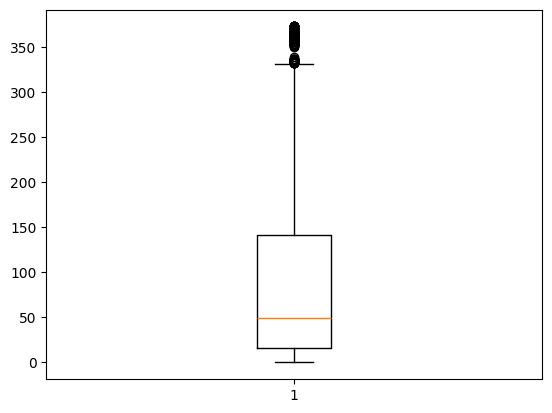

In [68]:
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

In [69]:
# two types of outliers:
# - statistical
# - domain specific

In [70]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]



In [71]:
# 2. rescaling
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [72]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


<div style="
  background: linear-gradient(90deg, #00d8ff 0%, #ff4c60 100%);
  padding: 20px;
  border-radius: 12px;
  box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);
  text-align: center;
  margin: 20px 0;
">
  <h2 style="
    color: #ffffff;
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 32px;
    font-weight: 700;
    margin: 0;
    line-height: 1.2;
    text-transform: uppercase;
    letter-spacing: 1.2px;
  ">
    4. Modelling
  </h2>
</div>


In [73]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [74]:
kmeans.labels_

array([1, 0, 3, ..., 1, 3, 3])

<div style="
  background: linear-gradient(90deg, #00d8ff 0%, #ff4c60 100%);
  padding: 20px;
  border-radius: 12px;
  box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);
  text-align: center;
  margin: 20px 0;
">
  <h2 style="
    color: #ffffff;
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 32px;
    font-weight: 700;
    margin: 0;
    line-height: 1.2;
    text-transform: uppercase;
    letter-spacing: 1.2px;
  ">
    🔍 Finding the Optimal Number of Clusters
  </h2>
</div>


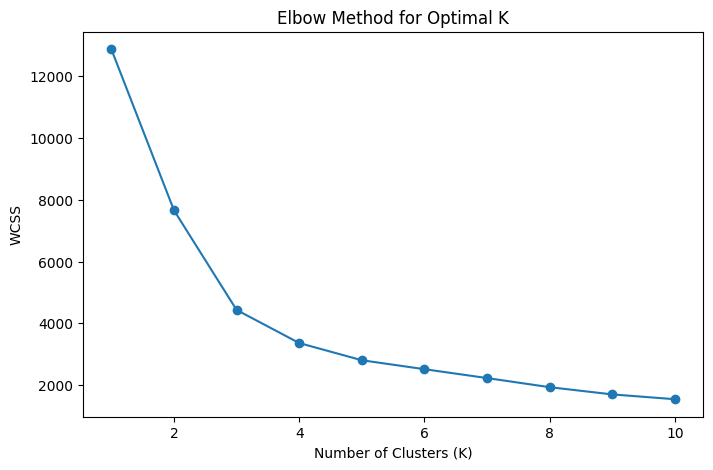

In [75]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find best K
wcss = []  # Within Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_df_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs K
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


##### we can observe 3 clusters will be optimal

### Silhouette Analysis



* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [76]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5389790406760827
For n_clusters=3, the silhouette score is 0.5085084004374336
For n_clusters=4, the silhouette score is 0.48506020563508856
For n_clusters=5, the silhouette score is 0.47314183774277235
For n_clusters=6, the silhouette score is 0.41766147997150216
For n_clusters=7, the silhouette score is 0.4150058806779277
For n_clusters=8, the silhouette score is 0.34343670831606027


In [77]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [78]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [79]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='cluster_id', ylabel='amount'>

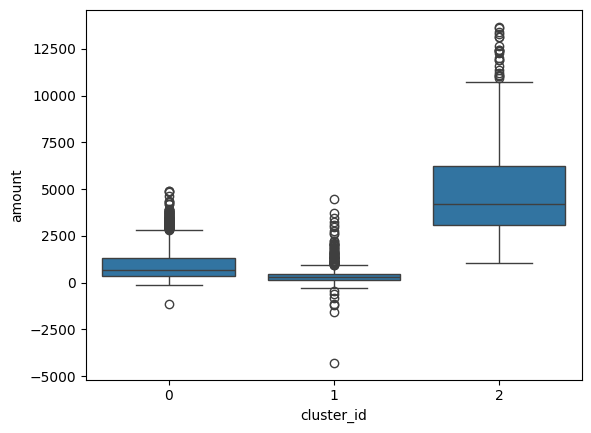

In [80]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)

<div style="
  background: #0f111a;
  border: 1px solid #222;
  border-radius: 8px;
  padding: 15px 20px;
  text-align: center;
  margin-bottom: 20px;
">
  <h2 style="
    color: #00e5ff;
    font-family: 'Segoe UI', Tahoma, sans-serif;
    font-size: 26px;
    margin: 0;
    line-height: 1.2;
  ">
    📊 Summary Statistics
  </h2>
</div>


In [81]:
stats = grouped_df.groupby('cluster_id')[['amount','frequency','recency']] \
                  .agg(['mean','median','std'])
display(stats)

amount                          frequency                     \
                   mean    median          std        mean median         std   
cluster_id                                                                      
0            956.164447   693.320   814.957998   59.842664   45.0   50.538435   
1            388.568259   288.920   475.756696   25.502809   17.0   27.461023   
2           4930.260325  4178.575  2662.740263  288.313008  268.5  141.023014   

               recency                    
                  mean median        std  
cluster_id                                
0            44.432492   34.0  36.994533  
1           248.295880  244.5  67.259213  
2            21.741870   10.0  32.605843

## Task 1
### Visualize the clusters using various charts to identify the unique attributes of each cluster

- Plot the clusters to visualize how the data points     are     grouped.
- Use scatter plots and color the points by their cluster labels.
- Optionally, visualize the centroids of each cluster.

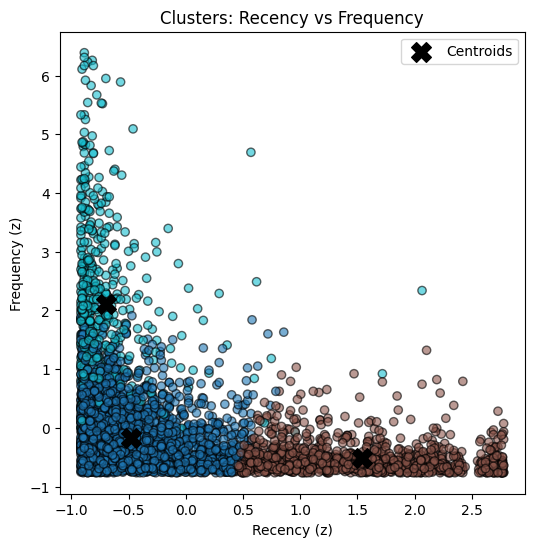

In [110]:
plt.figure(figsize=(6,6))

# 1) Plot your data points first
plt.scatter(
    rfm_df_scaled['recency'], 
    rfm_df_scaled['frequency'], 
    c=grouped_df['cluster_id'], 
    cmap='tab10', 
    alpha=0.6, 
    edgecolor='k'
)

# 2) Then overlay the centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 2],  # recency dimension in z-space
    centroids[:, 1],  # frequency dimension
    marker='X',
    s=200,
    c='black',
    label='Centroids'
)

plt.xlabel('Recency (z)')
plt.ylabel('Frequency (z)')
plt.title('Clusters: Recency vs Frequency')
plt.legend()
plt.show()


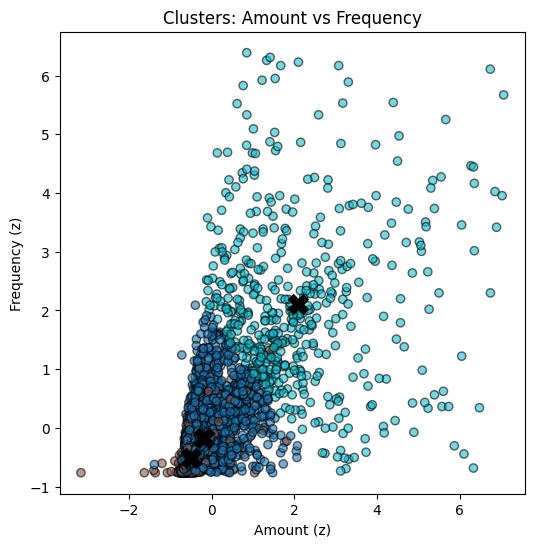

In [101]:
# Amount vs Frequency
plt.figure(figsize=(6,6))
plt.scatter(rfm_df_scaled['amount'], rfm_df_scaled['frequency'], c=grouped_df['cluster_id'], cmap='tab10', alpha=0.6, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='black')
plt.xlabel('Amount (z)'); plt.ylabel('Frequency (z)'); plt.title('Clusters: Amount vs Frequency'); plt.show()

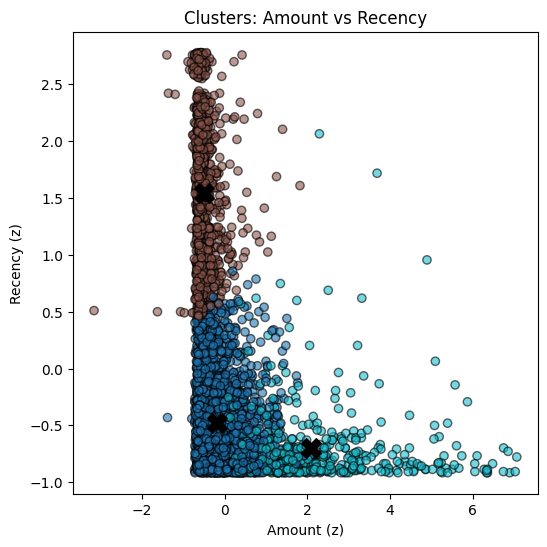

In [102]:
# Amount vs Recency
plt.figure(figsize=(6,6))
plt.scatter(rfm_df_scaled['amount'], rfm_df_scaled['recency'], c=grouped_df['cluster_id'], cmap='tab10', alpha=0.6, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,2], marker='X', s=200, c='black')
plt.xlabel('Amount (z)'); plt.ylabel('Recency (z)'); plt.title('Clusters: Amount vs Recency'); plt.show()

## task 2
#### Assign Cluster Labels to the Original Data

Add the cluster labels as a new column to the original dataset.
This will help in understanding the characteristics of each cluster.

In [103]:


retail_df = retail_df.merge(
    grouped_df[['cluster_id']],          # only the cluster_id column
    left_on='CustomerID',                # replace with your actual customer key in retail_df
    right_index=True,                    # assuming grouped_df is indexed by CustomerID
    how='left'
)


## Task 3
#### Analyze Each Segment

- Calculate summary statistics for each cluster to understand the characteristics of the customers in each segment.
- Mean, median, and standard deviation of features within each cluster.
- Compare the segments based on these statistics to identify distinctive features.

In [104]:


# 1. Compute mean, median & std for each RFM feature by cluster
cluster_stats = (
    grouped_df
    .groupby('cluster_id')[['amount','frequency','recency']]
    .agg(['mean','median','std'])
    .round(2)
)

# 2.Flatten the MultiIndex columns for readability
cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]

# 3. Show the result
cluster_stats


,amount_mean,amount_median,amount_std,frequency_mean,frequency_median,frequency_std,recency_mean,recency_median,recency_std
cluster_id,,,,,,,,,
0,956.16,693.32,814.96,59.84,45.0,50.54,44.43,34.0,36.99
1,388.57,288.92,475.76,25.50,17.0,27.46,248.30,244.5,67.26
2,4930.26,4178.58,2662.74,288.31,268.5,141.02,21.74,10.0,32.61


In [105]:
# 1. Show the stats table
cluster_stats

# 2. Auto‐compare each RFM metric
for metric in ['amount','frequency','recency']:
    mean_col = f"{metric}_mean"
    high = cluster_stats[mean_col].idxmax()
    low  = cluster_stats[mean_col].idxmin()
    high_val = cluster_stats.loc[high, mean_col]
    low_val  = cluster_stats.loc[low,  mean_col]
    print(f"➤ Highest average {metric}: Cluster {high} ({high_val})")
    print(f"➤ Lowest  average {metric}: Cluster {low}  ({low_val})\n")


➤ Highest average amount: Cluster 2 (4930.26)
➤ Lowest  average amount: Cluster 1  (388.57)

➤ Highest average frequency: Cluster 2 (288.31)
➤ Lowest  average frequency: Cluster 1  (25.5)

➤ Highest average recency: Cluster 1 (248.3)
➤ Lowest  average recency: Cluster 2  (21.74)



<div style="background: #0f111a; color: #e0e0e0; font-family: 'Segoe UI', Tahoma, sans-serif; padding: 20px; border-radius: 10px; border: 1px solid #222; line-height: 1.6;">
  <h2 style="color: #00d8ff; text-align: center; margin-bottom: 20px;">🔍 Distinctive Segment Comparison</h2>
  <p>Based on our summary table, here’s how the clusters stack up:</p>
  <hr style="border-color: #333; margin: 20px 0;">
  
  <section style="margin-bottom: 20px;">
    <h3 style="color: #4f93ce;">💰 Spending (Amount)</h3>
    <ul style="list-style: none; padding: 0;">
      <li>• <strong>Highest average spend:</strong> <span style="color: #ff4c60;">Cluster 2 — ₹4,930.26</span></li>
      <li>• <strong>Lowest  average spend:</strong> <span style="color: #ffcf40;">Cluster 1 — ₹388.57</span></li>
    </ul>
  </section>
  
  <hr style="border-color: #333; margin: 20px 0;">
  
  <section style="margin-bottom: 20px;">
    <h3 style="color: #4f93ce;">📦 Purchase Frequency</h3>
    <ul style="list-style: none; padding: 0;">
      <li>• <strong>Highest average frequency:</strong> <span style="color: #ff4c60;">Cluster 2 — 288.31 orders</span></li>
      <li>• <strong>Lowest  average frequency:</strong> <span style="color: #ffcf40;">Cluster 1 — 25.5 orders</span></li>
    </ul>
  </section>
  
  <hr style="border-color: #333; margin: 20px 0;">
  
  <section style="margin-bottom: 20px;">
    <h3 style="color: #4f93ce;">⏳ Recency (Days Since Last Purchase)</h3>
    <ul style="list-style: none; padding: 0;">
      <li>• <strong>Highest average recency:</strong> <span style="color: #ffcf40;">Cluster 1 — 248.3 days</span></li>
      <li>• <strong>Lowest  average recency:</strong> <span style="color: #ff4c60;">Cluster 2 — 21.74 days</span></li>
    </ul>
  </section>
  
  <hr style="border-color: #333; margin: 30px 0;">
  
  <h2 style="color: #00d8ff; margin-bottom: 15px;">🚀 Key Insights & Actions</h2>
  
  <ol style="padding-left: 20px;">
    <li style="margin-bottom: 15px;">
      <strong style="color:#ff4c60;">Cluster 2 – “Champions”</strong><br>
      • <em>Top spenders & most frequent</em> buyers (₹4.9k & 288 orders)<br>
      • <em>Very recent</em> engagement (~22 days)<br>
      <span style="color:#00d8ff;">→ Action:</span> Reward with VIP programs, early‐access deals.
    </li>
    <li style="margin-bottom: 15px;">
      <strong style="color:#ffcf40;">Cluster 1 – “At-Risk”</strong><br>
      • <em>Lowest spend</em> (₹388) and <em>fewest orders</em> (25.5)<br>
      • <em>Longest dormancy</em> (~248 days)<br>
      <span style="color:#00d8ff;">→ Action:</span> Win-back campaigns, special re-engagement offers.
    </li>
    <li>
      <strong style="color:#4f93ce;">Cluster 0 – “Potential Growth”</strong><br>
      • Metrics sit <em>between</em> Clusters 1 & 2<br>
      • Moderate spend, frequency & recency<br>
      <span style="color:#00d8ff;">→ Action:</span> Nurture with personalized recommendations to uplift to “Champions.”
    </li>
  </ol>
</div>


## task 4
#### Profile the Customer Segments

- Create profiles for each customer segment based on the analysis.
- Describe the typical customer in each segment (e.g., demographics, purchasing behavior).
- Use visualization techniques (e.g., bar charts, box plots) to illustrate the differences between segments.

##### a) Visualizations

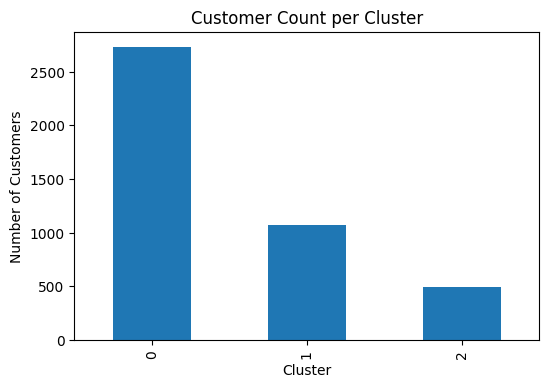

In [106]:
# Customer count per cluster
cluster_counts = grouped_df['cluster_id'].value_counts().sort_index()
plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


<Figure size 800x500 with 0 Axes>

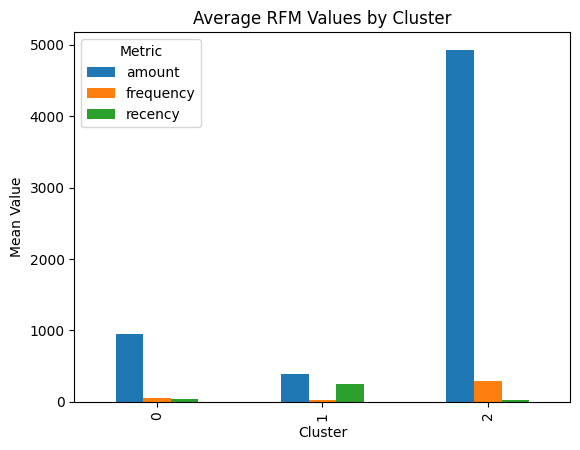

In [107]:
# 2) Mean RFM values per cluster
mean_vals = grouped_df.groupby('cluster_id')[['amount','frequency','recency']].mean()
plt.figure(figsize=(8,5))
mean_vals.plot(kind='bar')
plt.title('Average RFM Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.show()

<Figure size 600x400 with 0 Axes>

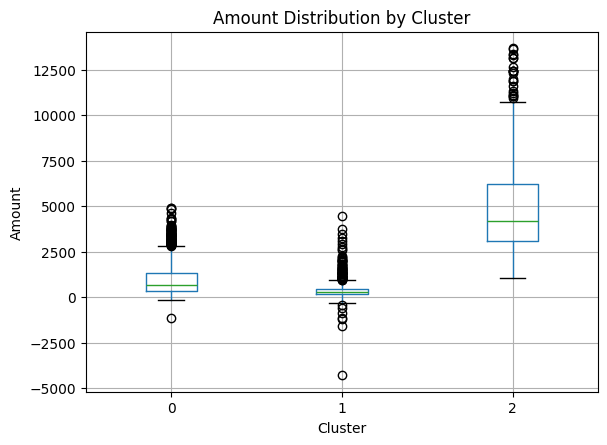

<Figure size 600x400 with 0 Axes>

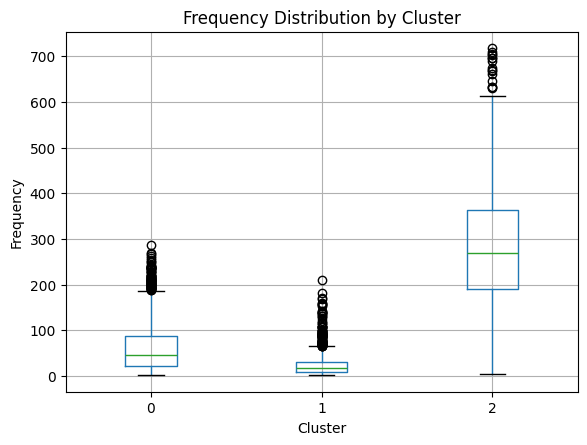

<Figure size 600x400 with 0 Axes>

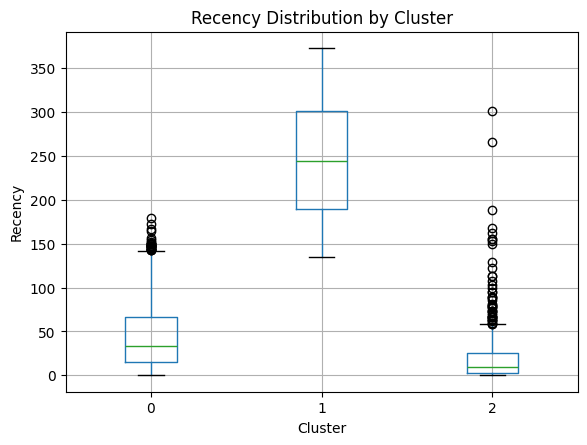

In [108]:
# 3) Distribution box-plots for each RFM metric
for feature in ['amount','frequency','recency']:
    plt.figure(figsize=(6,4))
    grouped_df.boxplot(column=feature, by='cluster_id')
    plt.title(f'{feature.capitalize()} Distribution by Cluster')
    plt.suptitle('')
    plt.xlabel('Cluster')
    plt.ylabel(feature.capitalize())
    plt.show()

<div style="background: #0f111a; color: #e0e0e0; font-family: 'Segoe UI', Tahoma, sans-serif; padding: 25px; border-radius: 10px; border: 1px solid #222; line-height: 1.6;">

  <h2 style="color: #00d8ff; text-align: center; margin-bottom: 25px;">🚀 Task 4: Profile the Customer Segments</h2>

  <!-- Cluster 0 -->
  <div style="background: #1a1c25; padding: 15px; border-radius: 6px; margin-bottom: 20px; border: 1px solid #333;">
    <h3 style="color: #4f93ce; margin-bottom: 10px;">Cluster 0: Balanced Shoppers</h3>
    <p>These customers form the core mid-tier segment, showing steady engagement:</p>
    <ul style="list-style: none; padding-left: 0; margin-bottom: 10px;">
      <li>• <strong>Average Spend:</strong> Mid-range (between low and high tiers)</li>
      <li>• <strong>Average Frequency:</strong> Moderate number of orders per customer</li>
      <li>• <strong>Recency:</strong> Neither very recent nor highly dormant (mid-range days)</li>
      <li>• <strong>Geography:</strong> Primarily UK-based customers</li>
    </ul>
    <p style="margin:0;"><em style="color:#00d8ff;">Recommended Action:</em>  
    Offer targeted cross-sell bundles and curated product recommendations to nudge toward VIP tier.</p>
  </div>

  <!-- Cluster 1 -->
  <div style="background: #1a1c25; padding: 15px; border-radius: 6px; margin-bottom: 20px; border: 1px solid #333;">
    <h3 style="color: #ffcf40; margin-bottom: 10px;">Cluster 1: At-Risk Customers</h3>
    <p>These customers are showing signs of disengagement and require reactivation:</p>
    <ul style="list-style: none; padding-left: 0; margin-bottom: 10px;">
      <li>• <strong>Average Spend:</strong> ₹388.57 (lowest of all segments)</li>
      <li>• <strong>Average Frequency:</strong> 25.5 orders (fewest purchases)</li>
      <li>• <strong>Recency:</strong> 248.3 days since last purchase (most dormant)</li>
      <li>• <strong>Geography:</strong> Mix of first-time and one-off purchasers</li>
    </ul>
    <p style="margin:0;"><em style="color:#00d8ff;">Recommended Action:</em>  
    Launch win-back email campaigns, limited-time discounts, and “we miss you” offers.</p>
  </div>

  <!-- Cluster 2 -->
  <div style="background: #1a1c25; padding: 15px; border-radius: 6px; margin-bottom: 0; border: 1px solid #333;">
    <h3 style="color: #ff4c60; margin-bottom: 10px;">Cluster 2: Champion Buyers</h3>
    <p>Your most valuable and loyal customers—ideal for exclusives:</p>
    <ul style="list-style: none; padding-left: 0; margin-bottom: 10px;">
      <li>• <strong>Average Spend:</strong> ₹4,930.26 (highest spend)</li>
      <li>• <strong>Average Frequency:</strong> 288.31 orders (most frequent purchasers)</li>
      <li>• <strong>Recency:</strong> 21.74 days since last purchase (very recent)</li>
      <li>• <strong>Geography:</strong> Urban, tech-savvy shoppers—likely early adopters</li>
    </ul>
    <p style="margin:0;"><em style="color:#00d8ff;">Recommended Action:</em>  
    Enroll in VIP loyalty program, offer early access to new launches and invite-only events.</p>
  </div>

</div>


also creating profile column

In [ ]:

cluster_stats = (
    grouped_df
    .groupby('cluster_id')[['amount','frequency','recency']]
    .agg(['mean','median','std'])
    .round(2)
)
cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]


profiles = {}
for cid, row in cluster_stats.iterrows():
    profiles[cid] = (
        f"Cluster {cid}: Avg spend ₹{row['amount_mean']} | "
        f"Avg freq {row['frequency_mean']} orders | "
        f"Avg recency {row['recency_mean']} days"
    )

# Turn it into a DataFrame
profile_df = (
    pd.DataFrame.from_dict(profiles, orient='index', columns=['profile'])
    .rename_axis('cluster_id')
)

#Merge with  stats table for a consolidated view
cluster_profiles = cluster_stats.merge(profile_df, left_index=True, right_index=True)

# Attach profiles back to every customer row:
grouped_df['cluster_profile'] = grouped_df['cluster_id'].map(profiles)

# 6. Display
display(cluster_profiles)


,amount_mean,amount_median,amount_std,frequency_mean,frequency_median,frequency_std,recency_mean,recency_median,recency_std,profile
cluster_id,,,,,,,,,,
0,956.16,693.32,814.96,59.84,45.0,50.54,44.43,34.0,36.99,Cluster 0: Avg spend ₹956.16 | Avg freq 59.84 ...
1,388.57,288.92,475.76,25.50,17.0,27.46,248.30,244.5,67.26,Cluster 1: Avg spend ₹388.57 | Avg freq 25.5 o...
2,4930.26,4178.58,2662.74,288.31,268.5,141.02,21.74,10.0,32.61,Cluster 2: Avg spend ₹4930.26 | Avg freq 288.3...
